# CIFAR-10 for Image Recoginition.

## Introduction.

In the present notebook we present an application of the Convolutional Neural Network architecture to the dataset CIFAR-10, which consists in a series of images named with 10 different labels. The main objective of this notebook is to extend the instances of the dataset changing the images and train the neural network comparing Batch normalization. 

To begin, we need to install the following libraries:

In [ ]:
!pip install tensorflow-gpu==2.0.0-rc0

In [ ]:
!pip install mlxtend==0.17.0

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

In [3]:
print(tf.__version__)

2.0.0-rc0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [5]:
from tensorflow.keras.datasets import cifar10

In [6]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 89s 1us/step


In [7]:
classes_name = ['airplane',
                'automobile',
                'bird',
                'cat',
                'deer',
                'dog',
                'frog',
                'horse',
                'ship',
                'truck']

We proceed to the normalization of the training and test sets.

In [8]:
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

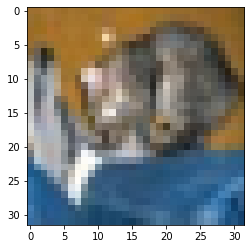

In [9]:
plt.imshow(X_test[0])

## Build Convolutional Neural Network Model

In [11]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', input_shape = [32, 32, 3]))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu')) # we don't have to define the input size here
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'valid'))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [13]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size = 10, epochs = 10, verbose = 1, validation_data = (X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
23010/50000 [============>.................] - ETA: 1:32 - loss: 1.4941 - sparse_categorical_accuracy: 0.4639

In [ ]:
# plot training and validation accuracy values
epoch_range = range(1, 11)
plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
plt.title('Model_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc = 'upper left')
plt.show()

# plot training and validation loss values
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = model.predict_classes(X_test)

In [ ]:
mat = confusion_matrix(y_test, y_pred)

In [ ]:
plot_confusion_matrix(mat, figsize = (12, 12), class_names = classes_name, show_normed = True)